In [36]:
import pandas
import os

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV path for file"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    joined_frame = pandas.DataFrame(index=dates)
    for symbol in symbols:
        symbol_frame = pandas.read_csv(symbol_to_path(symbol),
                                index_col="Date",
                                parse_dates=True,
                                usecols=["Date", "Adj Close"]                 
                               )
        joined_frame = joined_frame.join(symbol_frame, how="inner").rename(columns={'Adj Close': symbol})
    return joined_frame

dates = pandas.date_range("2019-04-01", "2020-02-01")
symbols = ["GOOG", "IBM", "GLD"]

data_frame = get_data(symbols, dates)
data_frame

,SPY,GOOG,IBM,GLD
2019-04-01,280.106659,1194.430054,136.905136,121.529999
2019-04-02,280.243835,1200.489990,136.618515,121.980003
2019-04-03,280.684845,1205.920044,137.220383,121.800003
2019-04-04,281.429596,1215.000000,136.408325,122.110001
2019-04-05,282.791809,1207.150024,136.886017,121.980003
...,...,...,...,...
2020-01-27,321.608856,1433.900024,137.187454,148.990005
2020-01-28,324.979034,1452.560059,138.107864,147.660004
2020-01-29,324.710602,1458.630005,136.267075,148.460007
2020-01-30,325.764404,1455.839966,135.356583,148.470001


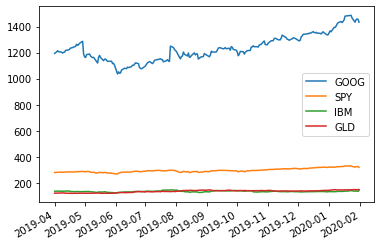

In [37]:
import matplotlib.pyplot as plt

data_frame[["GOOG", "SPY", "IBM", "GLD"]].plot()
plt.show()

In [39]:
data_frame["2019-04-05":"2019-04-10"][["SPY", "GLD"]]

,SPY,GLD
2019-04-05,282.791809,121.980003
2019-04-08,283.007416,122.510002
2019-04-09,281.557007,123.150002
2019-04-10,282.517426,123.529999


In [66]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_frame.values)
scaled_frame = pandas.DataFrame(x_scaled, columns=data_frame.columns)
scaled_frame.set_index(data_frame.index, inplace=True)
scaled_frame

,SPY,GOOG,IBM,GLD
2019-04-01,0.181080,0.351228,0.600238,0.054100
2019-04-02,0.183331,0.364682,0.588072,0.069411
2019-04-03,0.190568,0.376737,0.613619,0.063287
2019-04-04,0.202790,0.396896,0.579150,0.073835
2019-04-05,0.225144,0.379468,0.599426,0.069411
...,...,...,...,...
2020-01-27,0.862144,0.882887,0.612221,0.988432
2020-01-28,0.917449,0.924315,0.651289,0.943178
2020-01-29,0.913044,0.937791,0.573154,0.970398
2020-01-30,0.930337,0.931597,0.534507,0.970738


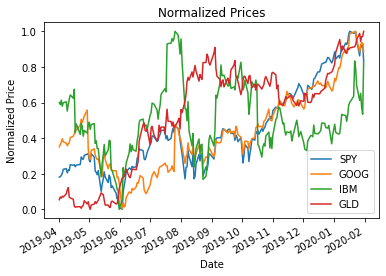

In [69]:
normalized_plot = scaled_frame.plot(title="Normalized Prices")
normalized_plot.set_xlabel("Date")
normalized_plot.set_ylabel("Normalized Price")
plt.show()